<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


In this lab, you will predict if the Falcon 9 first stage will land successfully by performing EDA and feature engineering.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of unsuccessful landings are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. SpaceX performs controlled landings in the oceans.


## Objectives

Perform exploratory data analysis and feature engineering using `Pandas` and `Matplotlib`.

- Perform EDA
- Prepare data for feature engineering


## Importing Libraries and Defining Auxiliary Functions

In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis


In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, see how the `FlightNumber` (indicating the continuous launch attempts) and `Payload` variables affect the launch outcome.

Plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code> and overlay the outcome of the launch. As the flight number increases, the first stage is more likely to land successfully. The payload mass is also important as it seems the more massive the payload, the less likely the first stage will return.

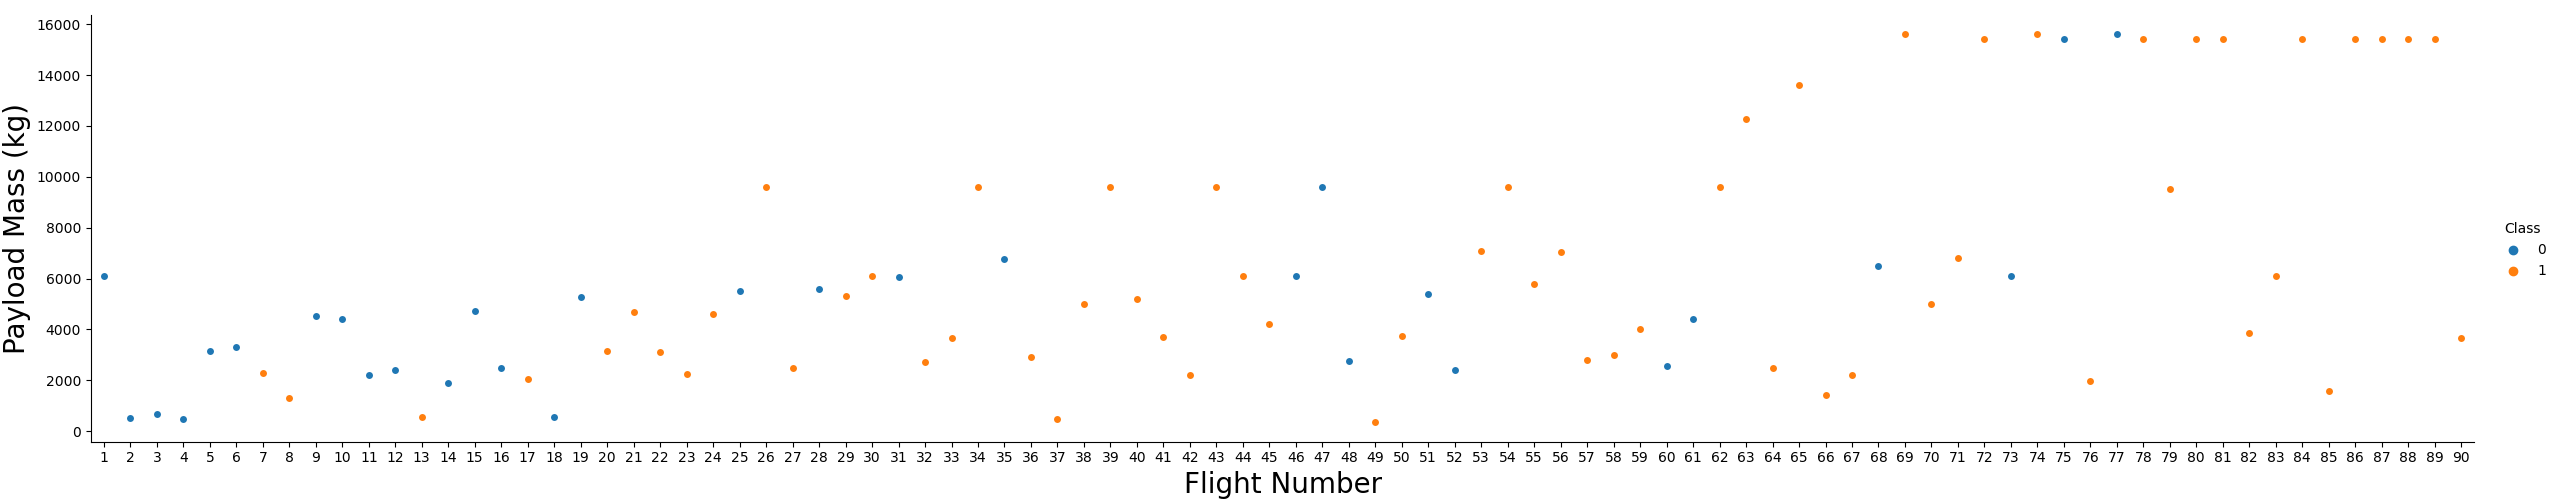

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Payload Mass (kg)", fontsize=20)
plt.show()

Different launch sites have different success rates. <code>CCAFS LC-40</code> has a success rate of 60% while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> have a success rate of 77%.

### TASK 1: Visualize the relationship between flight number and launch site

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs. <code>LaunchSite</code>, set the parameter <code>x</code>  parameter to <code>FlightNumber</code>, set the <code>y</code> to <code>Launch Site</code>, and set the parameter <code>hue</code> to <code>'class'</code>.

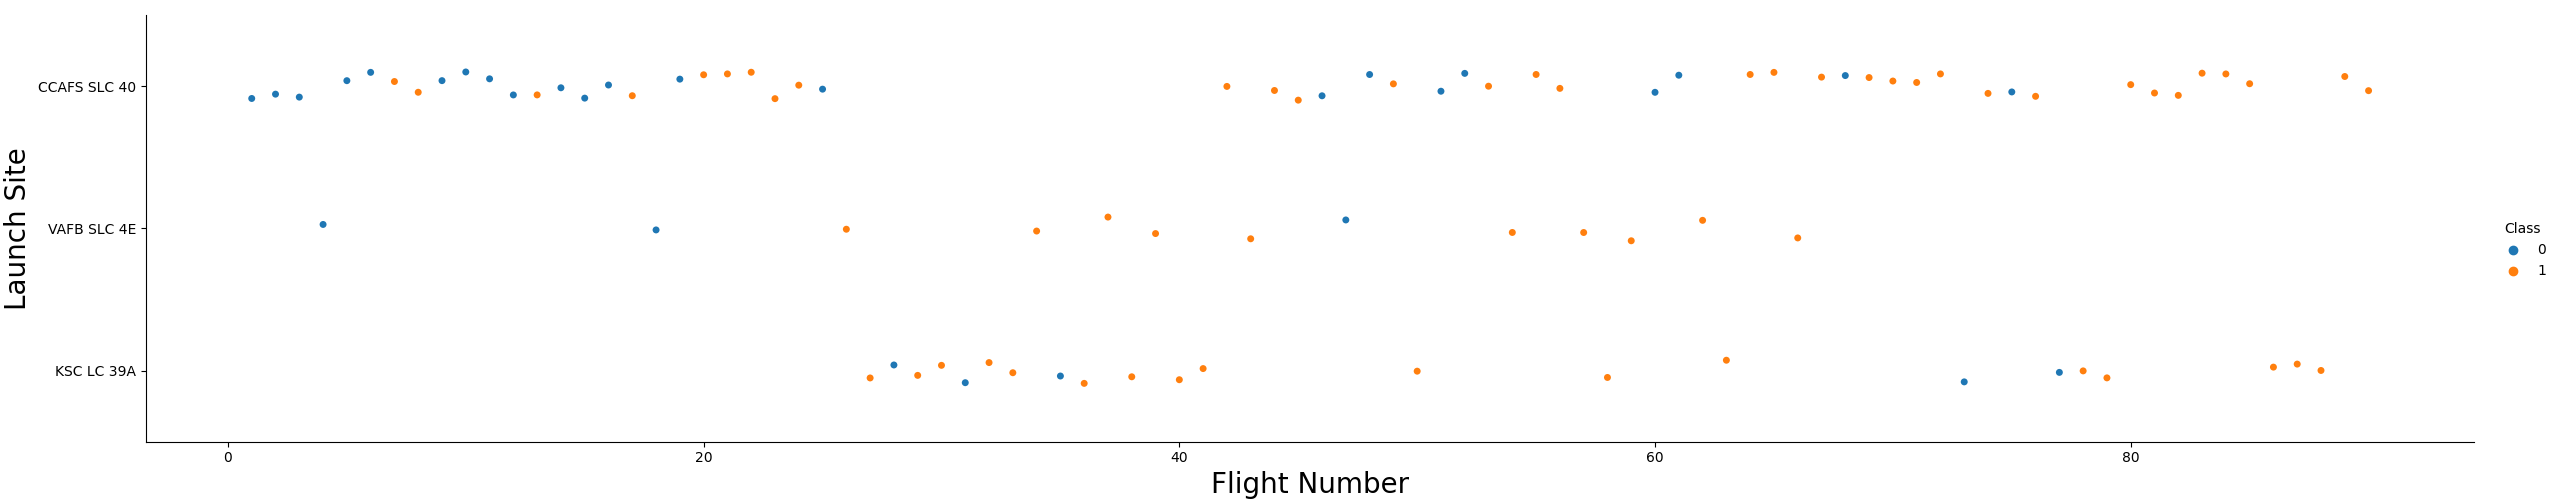

In [10]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

### TASK 2: Visualize the relationship between payload and launch site

Observe if there is any relationship between launch sites and their payload mass.

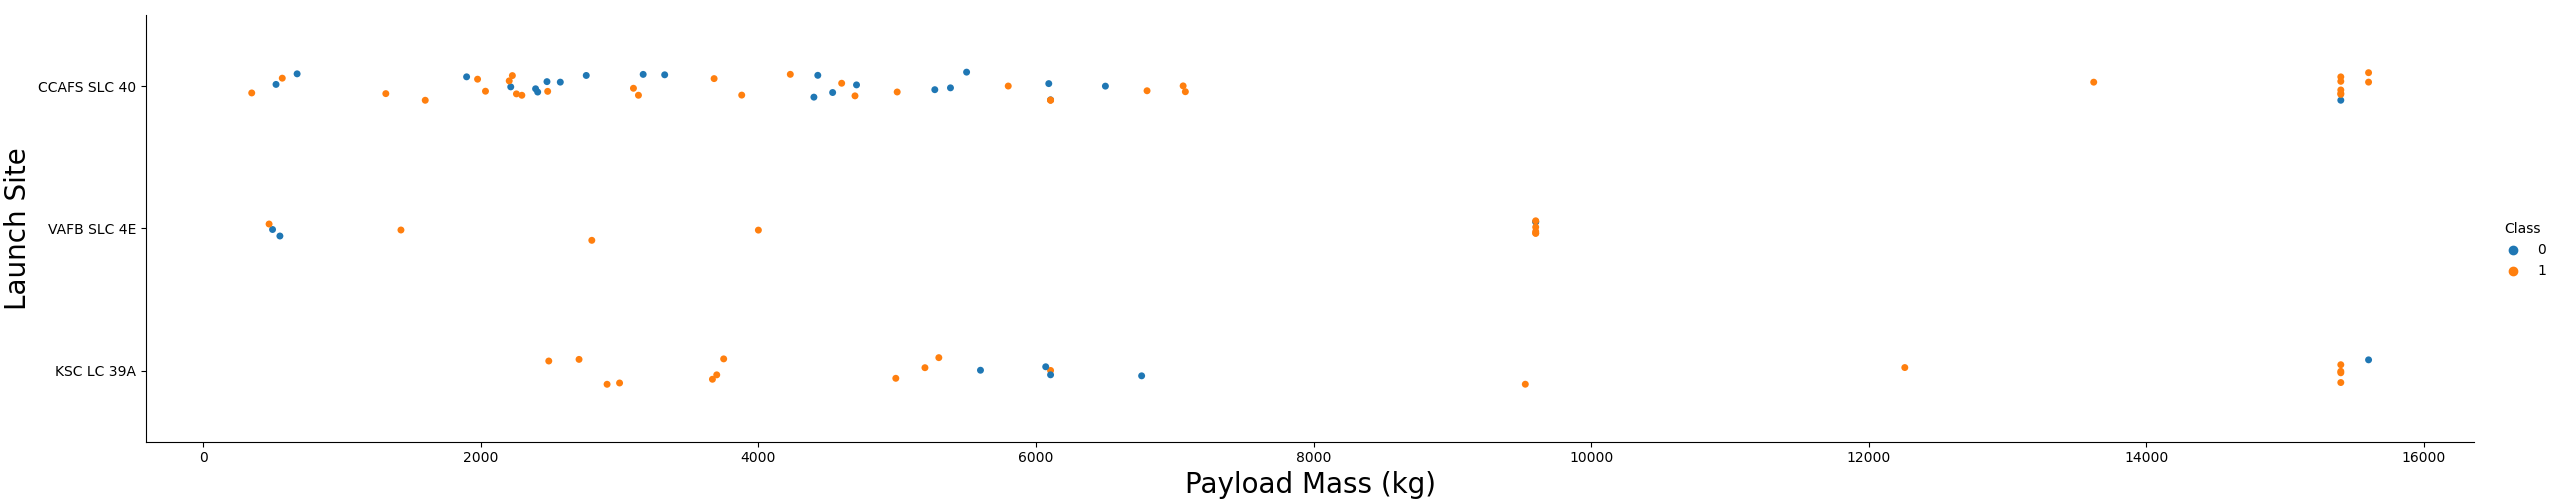

In [6]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect=5)
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

Observing the scatter point chart, there are no rockets launched with a heavy payload mass (greater than 10000) for the VAFB-SLC launch site.


### TASK  3: Visualize the relationship between success rate of each orbit type


Observe if there is any relationship between success rate and orbit type.


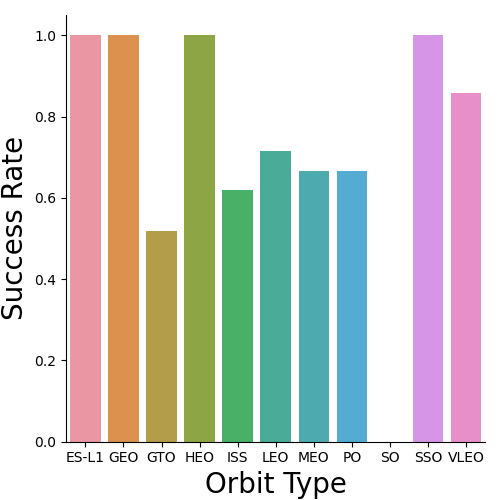

In [7]:
sns.catplot(y='Class', x='Orbit', data=df.groupby('Orbit')['Class'].mean().reset_index(), kind='bar')
plt.xlabel('Orbit Type', fontsize=20)
plt.ylabel('Success Rate', fontsize=20)
plt.show()

### TASK  4: Visualize the relationship between flight number and orbit type


Observe if there is any relationship between flight number and orbit type.


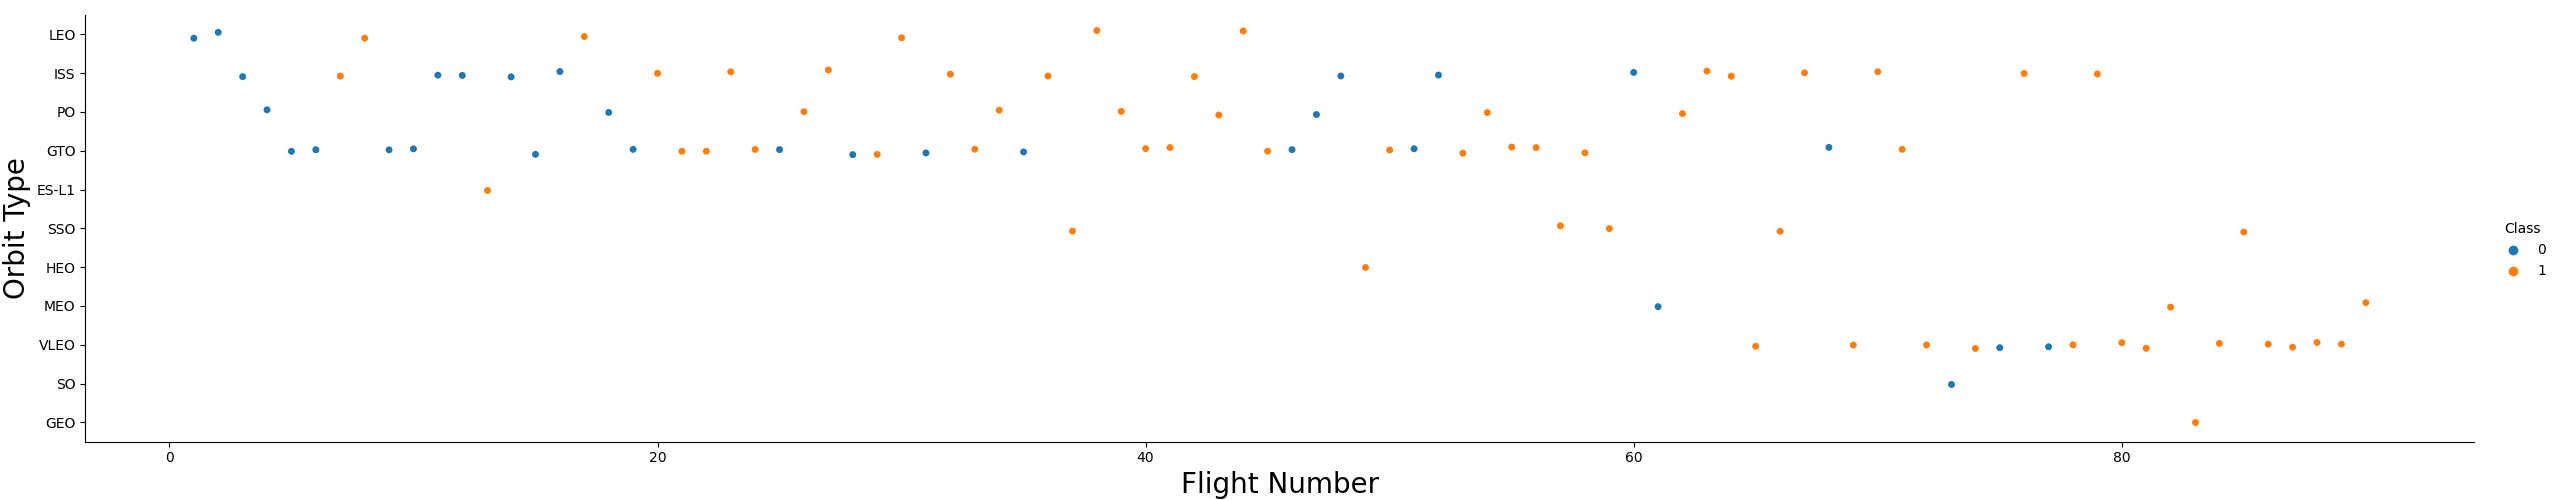

In [8]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Orbit Type", fontsize=20)
plt.show()

In the LEO orbit, success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

### TASK  5: Visualize the relationship between payload and orbit type


Similarly, observe if there is any relationship between payload and orbit type.


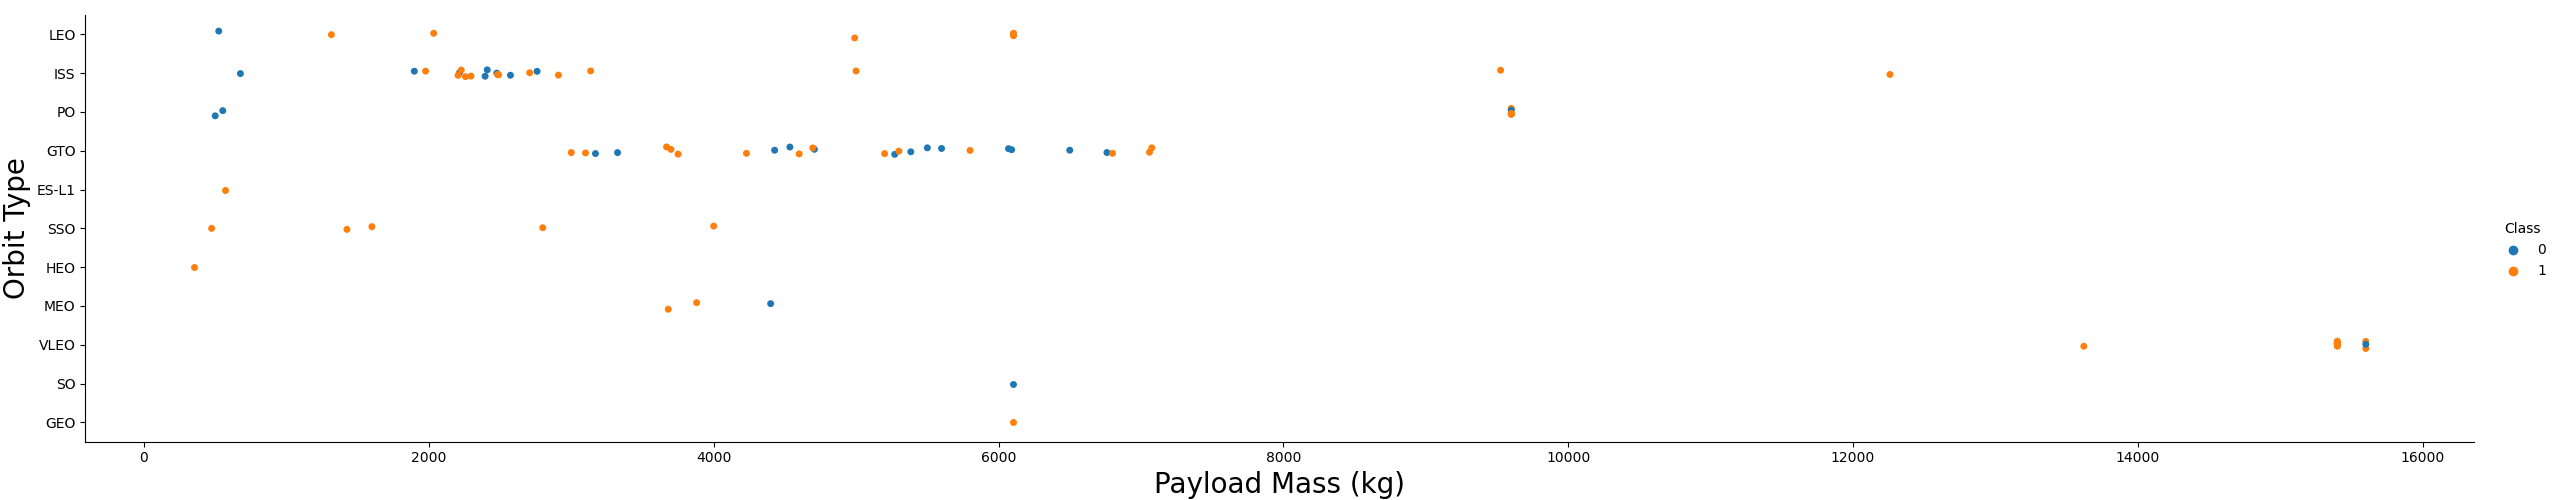

In [9]:
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect=5)
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Orbit Type", fontsize=20)
plt.show()

With heavy payloads, the successful landing or positive landing rate is more for the Polar, LEO, and ISS orbit types; however for GTO, it is not possible to distinguish this well as both positive landing rate and negative landing are both scattered in the same range.


### TASK  6: Visualize the launch success yearly trend


Plot a line chart with the x-axis as <code>Year</code> and y-axis as average success rate in order to get the average launch success trend.


In [10]:
def extract_year():
    for i in df['Date']:
        year.append(i.split("-")[0])
    return year

year = []
extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


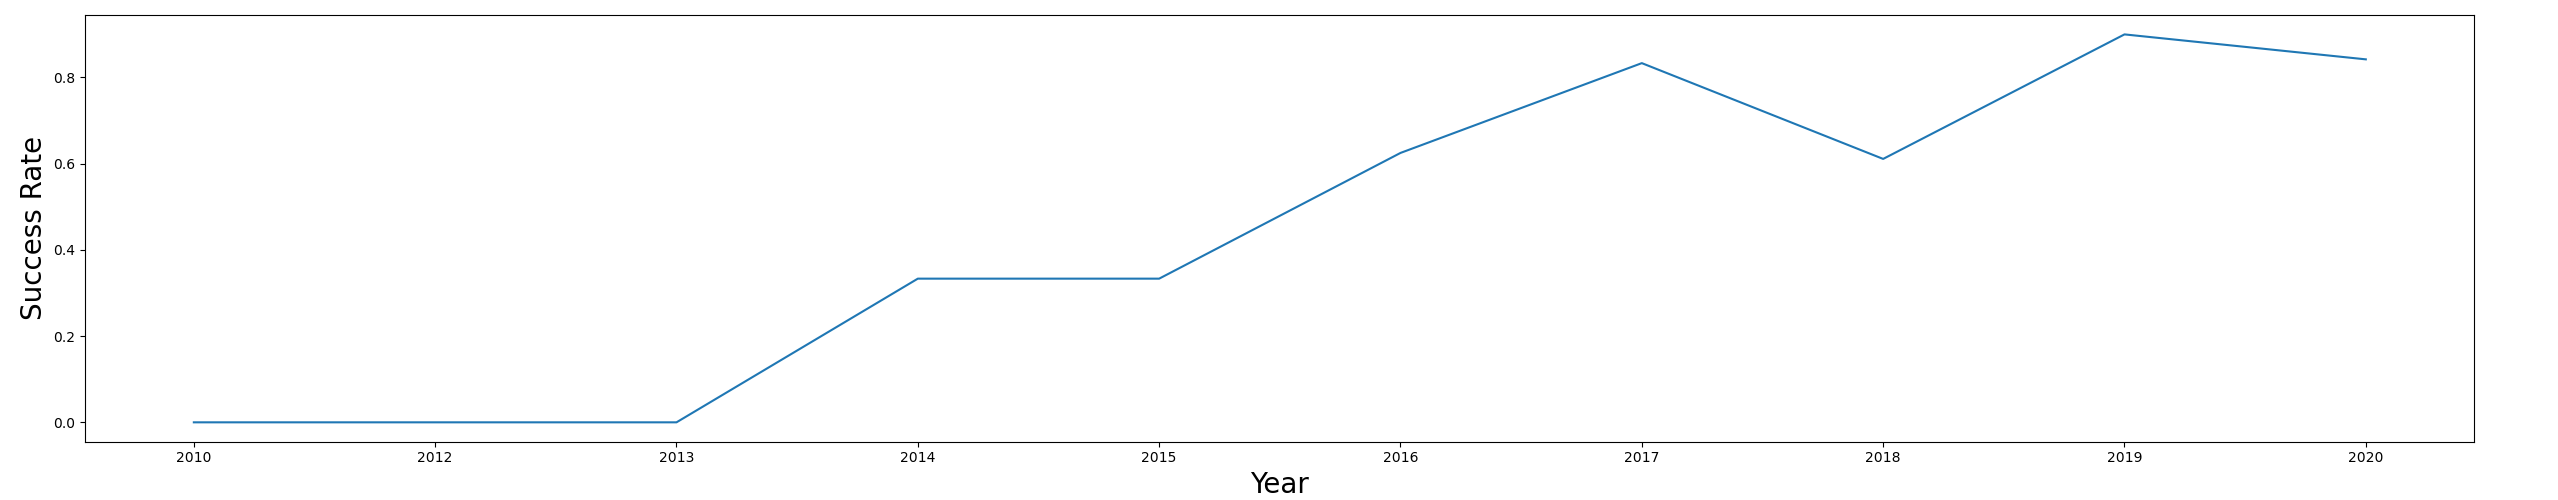

In [11]:
success_rate = df.groupby('Date')['Class'].mean()
sns.lineplot(y=success_rate, x=success_rate.index)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Success Rate", fontsize=20)
plt.show()

Observe that the success rate keeps increasing from 2013 till 2020.

## Feature Engineering


Now that preliminary insights have been obtained regarding how each important variable affects the success rate, it is time to select the features that will be used in success prediction.


In [13]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables for categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. The result DataFrame should include all features, including the encoded ones.


In [14]:
features_one_hot = pd.get_dummies(df, columns=['Orbit', 'LaunchSite','LandingPad', 'Serial'], drop_first=False)
features_one_hot.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,Block,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,2010,Falcon 9,6104.959412,None None,1,False,False,False,1.0,...,0,0,0,0,0,0,0,0,0,0
1,2,2012,Falcon 9,525.000000,None None,1,False,False,False,1.0,...,0,0,0,0,0,0,0,0,0,0
2,3,2013,Falcon 9,677.000000,None None,1,False,False,False,1.0,...,0,0,0,0,0,0,0,0,0,0
3,4,2013,Falcon 9,500.000000,False Ocean,1,False,False,False,1.0,...,0,0,0,0,0,0,0,0,0,0
4,5,2013,Falcon 9,3170.000000,None None,1,False,False,False,1.0,...,0,0,0,0,0,0,0,0,0,0


### TASK  8: Cast all numeric columns to `float64`


Now that the <code>features_one_hot</code> DataFrame only contains numbers, cast the entire dataframe to the variable type <code>float64</code>.


In [15]:
features_one_hot = features_one_hot.astype('float64', errors='ignore')

In [16]:
features_one_hot.to_csv('spacex_feature_engineered.csv', index=False)

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
